### CNN

In [2]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


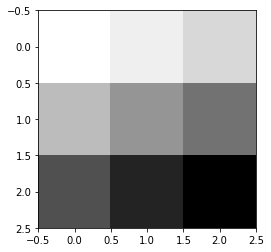

In [5]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap = 'Greys')

위의 (1,3,3,1)에서 1은 ?? 3X3
맨 처음 1: 하나의 이미지만 가지고 해보겠다.
맨 마지막 1: color 1개

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


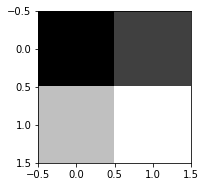

In [6]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'VALID')
conv2d_img = conv2d.eval() #텐서플로로 실행시킴
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2,2), cmap = 'gray')

(weight.shape)filter: (2,2,1,1)
(2x2, 1: color, 1: 몇 개의 filter인지(필터의 개수))

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


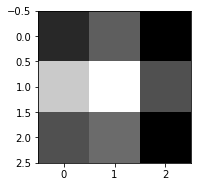

In [7]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]]) #filter의 값
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'SAME')
#padding option을 same이라고 주면 stride가 1x1 기준일 때 원래 사이즈와
#출력하는 사이즈가 같도록 함수가 필요한만큼 0으로 채운다.
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap = 'gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


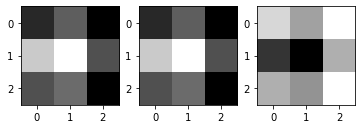

In [8]:
#여러 개의 filter를 사용할 수 있음.
print('image.shape', image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                     [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
#필터를 세 장을 쓰게 되면 세 장의 이미지가 나온다.
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'SAME')
#이 함수 하나만 거치면 세 장이 딱 출력.
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap = 'gray')

In [9]:
#maxpooling
image = np.array([[[[4],[3]],
                 [[2],[1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1,2,2,1],
                     strides = [1,1,1,1], padding = 'SAME')
#ksize = kernel size
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [10]:
#실제 이미지에 넣어본다.
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


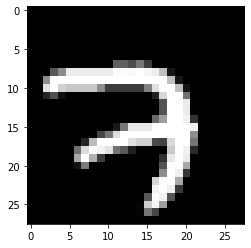

In [11]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap = 'gray')

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_4:0", shape=(1, 14, 14, 5), dtype=float32)


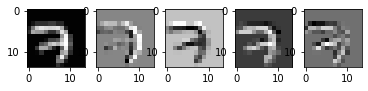

In [12]:
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)
#-1: 여러 개의 사진이므로 너네가 알아서 해, 28x28, 1개의 색 
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev = 0.01))
#[3,3,1,5]에서 1: color, 5: 5 filter, 3x3
conv2d = tf.nn.conv2d(img, W1, strides = [1,2,2,1], padding = 'SAME')
#1,2,2,1, 2X2로 가겠다면 2칸씩 움직이겠다.
#PADDING = SAME이면 1X1 STRIDE로는 똑같은 이미지 크기를 만든다고 했는데
#STRIDE가 2면 반으로 줄어야겠다.2칸씩 움직이게 되면 14X14
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap = 'gray')

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], strides = [
    1,2,2,1], padding = 'SAME')#ksize = kernel(filter) size
#stride가 2면 또 반으로 줄어듦, 14x14->7x7
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap = 'gray')
#subsampling되어 해상도가 줄어듦.

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)
